<a href="https://colab.research.google.com/github/soroor-ag/MachineLearning2024/blob/main/mini_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# q1

##q1-1

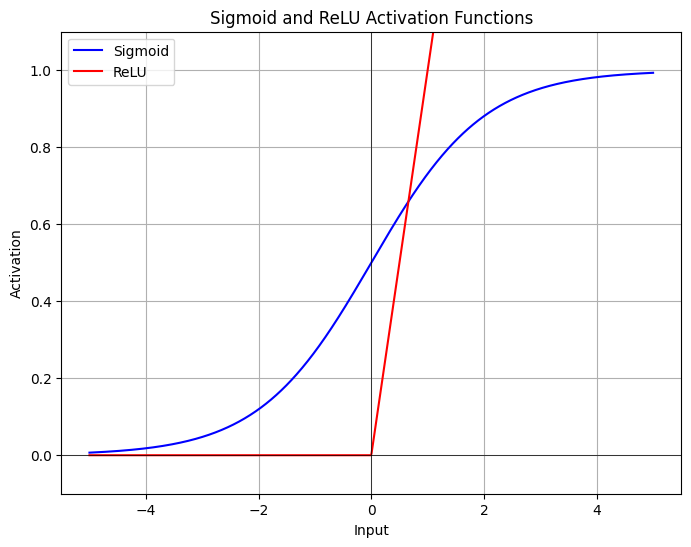

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu_function(x):
    return np.maximum(0, x)

# Define input range
x = np.linspace(-5, 5, 1000)

# Compute activations
sigmoid_output = sigmoid_function(x)
relu_output = relu_function(x)

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(x, sigmoid_output, label='Sigmoid', color='blue')
plt.plot(x, relu_output, label='ReLU', color='red')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlabel('Input')
plt.ylabel('Activation')
plt.title('Sigmoid and ReLU Activation Functions')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)

plt.show()

##q1-2

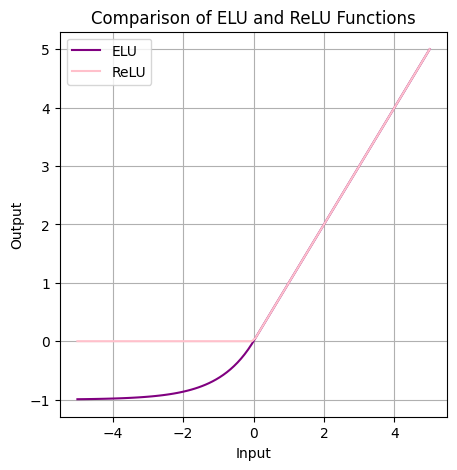

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعریف توابع فعال‌سازی ELU و ReLU
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def relu(x):
    return np.maximum(0, x)

# تولید مقادیر ورودی
x = np.linspace(-5, 5, 100)

# محاسبه مقادیر خروجی برای هر تابع
y_elu = elu(x)
y_relu = relu(x)

# رسم نمودار
plt.figure(figsize=(5, 5))

# ELU
plt.plot(x, y_elu, label='ELU', color='purple')

# ReLU
plt.plot(x, y_relu, label='ReLU', color='pink')

plt.title('Comparison of ELU and ReLU Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()


##q1-3

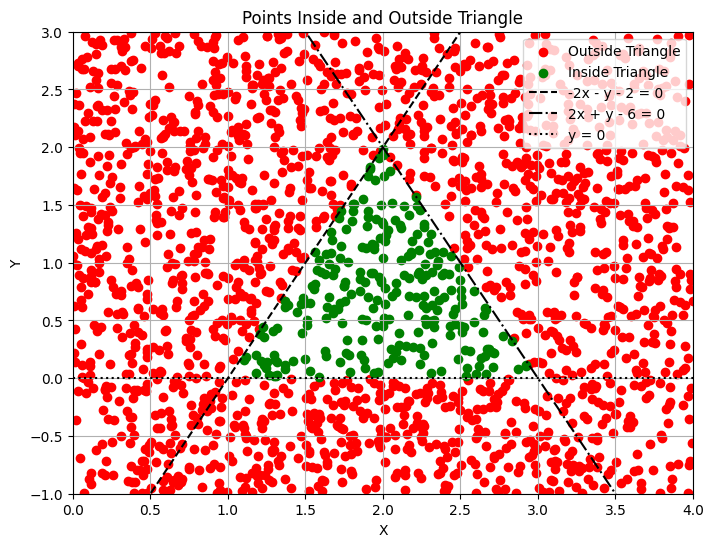

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#make a neuron
class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):
        if np.dot(self.weights, x) + self.threshold >= 0:
            return 1
        else:
            return 0

def tri(x, y):
    n1 = McCulloch_Pitts_neuron([2, -1], -2)  # Line 1: 2x - y - 2 = 0
    n2 = McCulloch_Pitts_neuron([-2, -1], 6)  # Line 2: -2x - y + 6 > 0
    n3 = McCulloch_Pitts_neuron([0, 1], 0)    # Line 3: y = 0

    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    # Point inside if all three conditions are satisfied
    if z1 == 1 and z2 == 1 and z3 == 1:
        return 1
    else:
        return 0

rand_points = 2000
x_value = np.random.uniform(0, 4, rand_points)
y_value = np.random.uniform(-1, 3, rand_points)

red_points = []
green_points = []

for i in range(rand_points):
    z4_value = tri(x_value[i], y_value[i])
    if z4_value == 0:
        red_points.append((x_value[i], y_value[i]))
    else:
        green_points.append((x_value[i], y_value[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))

# Plotting points
plt.scatter(red_x, red_y, color='red', label='Outside Triangle')
plt.scatter(green_x, green_y, color='green', label='Inside Triangle')

# Plotting lines with legends
# Line 1: -2x - y - 2 = 0
x_line1 = np.linspace(0, 4, 100)
y_line1 = 2*x_line1 - 2
plt.plot(x_line1, y_line1, color='black', linestyle='--', label='-2x - y - 2 = 0')

# Line 2: 2x + y - 6 = 0
x_line2 = np.linspace(0,4, 100)
y_line2 = 6 - 2*x_line2
plt.plot(x_line2, y_line2, color='black', linestyle='-.', label='2x + y - 6 = 0')

# Line 3: y = 0
x_line3 = np.linspace(0, 4, 100)
y_line3 = np.zeros_like(x_line3)
plt.plot(x_line3, y_line3, color='black', linestyle=':', label='y = 0')

plt.grid(True)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Inside and Outside Triangle')
plt.xlim(0,4)
plt.ylim(-1, 3)

# Save plot as PNG
plt.savefig('points_triangle.png', bbox_inches='tight')

plt.show()


In [ ]:
def sigmoid_function( x):

  return 1 / (1 + np.exp(-x))

def relu_function(x):
    return np.maximum(0, x)


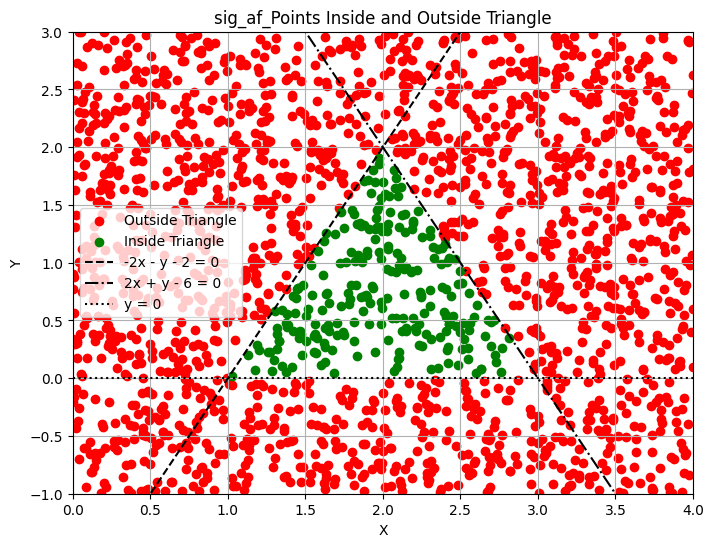

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold, af=sigmoid_function):
        self.weights = weights
        self.threshold = threshold
        self.af = af

    def model(self, x):
        net_input = np.dot(self.weights, x) + self.threshold
        activation = self.af(net_input)
        return activation
def tri(x, y):
    n1 = McCulloch_Pitts_neuron([2, -1], -2)  # Line 1: 2x - y - 2 = 0
    n2 = McCulloch_Pitts_neuron([-2, -1], 6)  # Line 2: -2x - y + 6 > 0
    n3 = McCulloch_Pitts_neuron([0, 1], 0)    # Line 3: y = 0

    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    # Point inside if all three conditions are satisfied
    if z1 >= 0.5 and z2 >= 0.5 and z3 >= 0.5:
        return 1
    else:
        return 0

rand_points = 2000
x_value = np.random.uniform(0, 4, rand_points)
y_value = np.random.uniform(-1, 3, rand_points)

red_points = []
green_points = []

for i in range(rand_points):
    z4_value = tri(x_value[i], y_value[i])
    if z4_value == 0:
        red_points.append((x_value[i], y_value[i]))
    else:
        green_points.append((x_value[i], y_value[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))

# Plotting points
plt.scatter(red_x, red_y, color='red', label='Outside Triangle')
plt.scatter(green_x, green_y, color='green', label='Inside Triangle')

# Plotting lines with legends
# Line 1: -2x - y - 2 = 0
x_line1 = np.linspace(0, 4, 100)
y_line1 = 2*x_line1 - 2
plt.plot(x_line1, y_line1, color='black', linestyle='--', label='-2x - y - 2 = 0')

# Line 2: 2x + y - 6 = 0
x_line2 = np.linspace(0,4, 100)
y_line2 = 6 - 2*x_line2
plt.plot(x_line2, y_line2, color='black', linestyle='-.', label='2x + y - 6 = 0')

# Line 3: y = 0
x_line3 = np.linspace(0, 4, 100)
y_line3 = np.zeros_like(x_line3)
plt.plot(x_line3, y_line3, color='black', linestyle=':', label='y = 0')

plt.grid(True)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('sig_af_Points Inside and Outside Triangle')
plt.xlim(0,4)
plt.ylim(-1, 3)

# Save plot as PNG
plt.savefig('sig_points_triangle.png', bbox_inches='tight')

plt.show()


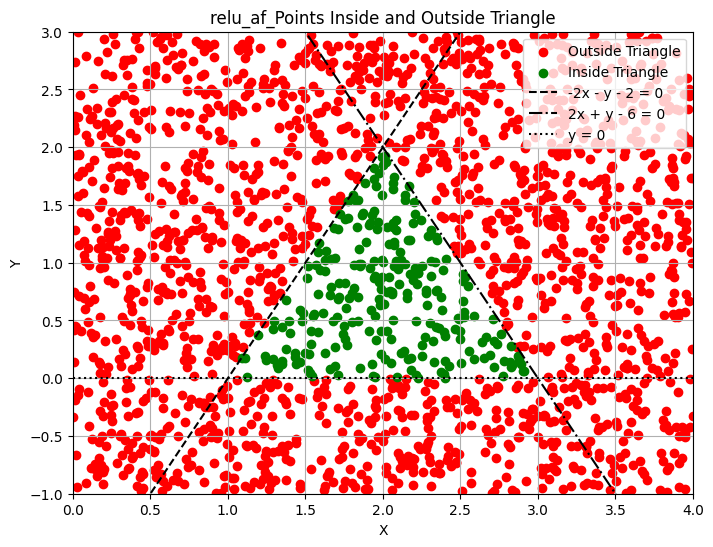

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold, af=relu_function):
        self.weights = weights
        self.threshold = threshold
        self.af = af

    def model(self, x):
        net_input = np.dot(self.weights, x) + self.threshold
        activation = self.af(net_input)
        return activation

def tri(x, y):
    n1 = McCulloch_Pitts_neuron([2, -1], -2)  # Line 1: 2x - y - 2 = 0
    n2 = McCulloch_Pitts_neuron([-2, -1], 6)  # Line 2: -2x - y + 6 > 0
    n3 = McCulloch_Pitts_neuron([0, 1], 0)    # Line 3: y = 0

    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    # Point inside if all three conditions are satisfied
    if z1 > 0 and z2 > 0 and z3 > 0:
        return 1
    else:
        return 0

rand_points = 2000
x_value = np.random.uniform(0, 4, rand_points)
y_value = np.random.uniform(-1, 3, rand_points)

red_points = []
green_points = []

for i in range(rand_points):
    z4_value = tri(x_value[i], y_value[i])
    if z4_value == 0:
        red_points.append((x_value[i], y_value[i]))
    else:
        green_points.append((x_value[i], y_value[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))

# Plotting points
plt.scatter(red_x, red_y, color='red', label='Outside Triangle')
plt.scatter(green_x, green_y, color='green', label='Inside Triangle')

# Plotting lines with legends
# Line 1: -2x - y - 2 = 0
x_line1 = np.linspace(0, 4, 100)
y_line1 = 2*x_line1 - 2
plt.plot(x_line1, y_line1, color='black', linestyle='--', label='-2x - y - 2 = 0')

# Line 2: 2x + y - 6 = 0
x_line2 = np.linspace(0,4, 100)
y_line2 = 6 - 2*x_line2
plt.plot(x_line2, y_line2, color='black', linestyle='-.', label='2x + y - 6 = 0')

# Line 3: y = 0
x_line3 = np.linspace(0, 4, 100)
y_line3 = np.zeros_like(x_line3)
plt.plot(x_line3, y_line3, color='black', linestyle=':', label='y = 0')

plt.grid(True)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('relu_af_Points Inside and Outside Triangle')
plt.xlim(0,4)
plt.ylim(-1, 3)

# Save plot as PNG
plt.savefig('points_triangle.png', bbox_inches='tight')

plt.show()


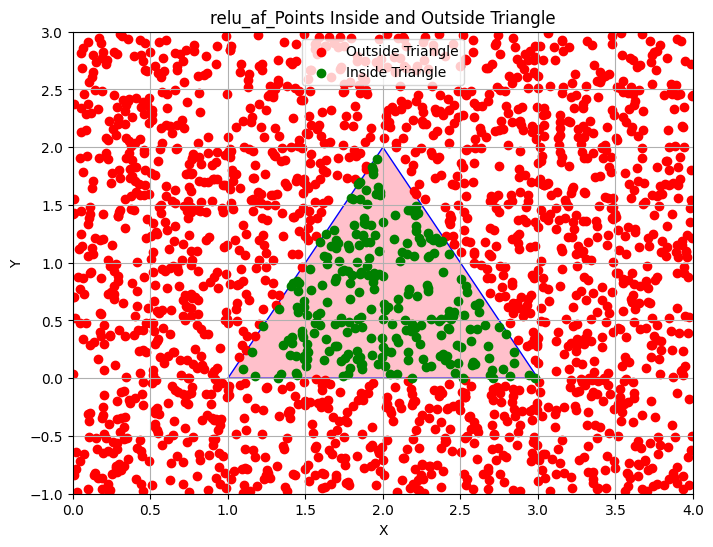

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold, af=relu_function):
        self.weights = weights
        self.threshold = threshold
        self.af = af

    def model(self, x):
        net_input = np.dot(self.weights, x) + self.threshold
        activation = self.af(net_input)
        return activation

def tri(x, y):
    n1 = McCulloch_Pitts_neuron([2, -1], -2)  # Line 1: 2x - y - 2 = 0
    n2 = McCulloch_Pitts_neuron([-2, -1], 6)  # Line 2: -2x - y + 6 > 0
    n3 = McCulloch_Pitts_neuron([0, 1], 0)    # Line 3: y = 0

    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    # Point inside if all three conditions are satisfied
    if z1 > 0 and z2 > 0 and z3 > 0:
        return 1
    else:
        return 0

rand_points = 2000
x_value = np.random.uniform(0, 4, rand_points)
y_value = np.random.uniform(-1, 3, rand_points)

red_points = []
green_points = []

for i in range(rand_points):
    z4_value = tri(x_value[i], y_value[i])
    if z4_value == 0:
        red_points.append((x_value[i], y_value[i]))
    else:
        green_points.append((x_value[i], y_value[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Draw triangle
triangle = Polygon(np.array([[1, 0], [2, 2], [3, 0]]), closed=True, edgecolor='blue', facecolor='pink')  # Outlined with blue lines
ax.add_patch(triangle)

# Plotting points
ax.scatter(red_x, red_y, color='red', label='Outside Triangle')
ax.scatter(green_x, green_y, color='green', label='Inside Triangle')  # Make points semi-transparent

ax.grid(True)
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('relu_af_Points Inside and Outside Triangle')
ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)

# Save plot as PNG
plt.savefig('points_triangle.png', bbox_inches='tight')

plt.show()


# q2

##import datasets for q2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from scipy import stats
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [ ]:
https://drive.google.com/file/d/11sXfvbC2J2CeosggI_7ri18gHUOJyao9/view?usp=sharing
https://drive.google.com/file/d/1t_Mwk8Mn46QrRH2PMSmSVf8wlCykRr6o/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1CH9RzRlTZHLXdwkRDvcsvLrPxdVDLIPt
!gdown 18nBBXwTydzUCFMjyrGYwJkGhH9GLbWYj
!gdown 11sXfvbC2J2CeosggI_7ri18gHUOJyao9
!gdown 1t_Mwk8Mn46QrRH2PMSmSVf8wlCykRr6o


  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From (original): https://drive.google.com/uc?id=1CH9RzRlTZHLXdwkRDvcsvLrPxdVDLIPt
From (redirected): https://drive.google.com/uc?id=1CH9RzRlTZHLXdwkRDvcsvLrPxdVDLIPt&confirm=t&uuid=ab9423de-13d8-4515-8e28-221fff82002c
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 39.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=18nBBXwTydzUCFMjyrGYwJkGhH9GLbWYj
From (redirected): https://drive.google.com/uc?id=18nBBXwTydzUCFMjyrGYwJkGhH9GLbWYj&confirm=t&uuid=16941853-d3c3-41a3-98ac-85bacfc7c144
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 25.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=11sXfvbC2J2CeosggI_7ri18gHUOJyao9
From (redirected): https://drive.google.com/uc?id=11sXfvbC2J2CeosggI_7ri18gHUOJyao9&confirm=t&uuid=3d039f50-7bf8-436f-a6fa-a6a6e17384e7
To: /content/118.mat
100% 2.94

In [ ]:
import numpy as np
import scipy.io

output_normal = '97.mat'  # Output file name for normal dataset
output_fault1 = '105.mat'   # Output file name for fault dataset
output_fault2 = '130.mat'   # Output file name for fault dataset
output_fault3 = '118.mat'   # Output file name for fault dataset


# Load the datasets using scipy
data_normal = scipy.io.loadmat(output_normal)
data_fault1 = scipy.io.loadmat(output_fault1)
data_fault2 = scipy.io.loadmat(output_fault2)
data_fault3 = scipy.io.loadmat(output_fault3)

# Print the keys present in the loaded dictionaries
print("Keys in data_normal:", data_normal.keys())
print("Keys in data_fault1:", data_fault1.keys())
print("Keys in data_fault2:", data_fault2.keys())
print("Keys in data_fault3:", data_fault3.keys())

Keys in data_normal: dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])
Keys in data_fault1: dict_keys(['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM'])
Keys in data_fault2: dict_keys(['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM'])
Keys in data_fault3: dict_keys(['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM'])


In [ ]:
#columne of normal and fualts
columns_data_normal = list(data_normal.keys())[-3:]
columns_data_fault1 = list(data_fault1.keys())[-4:]
columns_data_fault2 = list(data_fault2.keys())[-4:]
columns_data_fault3 = list(data_fault3.keys())[-4:]
columns_data_normal

['X097_DE_time', 'X097_FE_time', 'X097RPM']

In [ ]:
all_columns= np.concatenate((columns_data_normal, columns_data_fault1, columns_data_fault2,  columns_data_fault3 ))
all_columns

array(['X097_DE_time', 'X097_FE_time', 'X097RPM', 'X105_DE_time',
       'X105_FE_time', 'X105_BA_time', 'X105RPM', 'X130_DE_time',
       'X130_FE_time', 'X130_BA_time', 'X130RPM', 'X118_DE_time',
       'X118_FE_time', 'X118_BA_time', 'X118RPM'], dtype='<U12')

In [ ]:
mat = {}
M, N = 200, 200

for label, datasets in {'normal': data_normal, 'fault1': data_fault1, 'fault2': data_fault2, 'fault3': data_fault3}.items():
    if label == 'normal':
        cols = columns_data_normal
    elif label == 'fault1':
        cols = columns_data_fault1
    elif label == 'fault2':
        cols = columns_data_fault2
    elif label == 'fault3':
        cols = columns_data_fault3
    else:
        continue  # Skip if label is not recognized

    for col in cols:
        mat1 = np.zeros((M, N))
        for j in range(M):
            if j + N <= len(datasets[col]):
                mat1[j, :] = datasets[col][j:j+N].reshape(-1,)
            else:
                break  # Exit the loop if the window exceeds bounds of data
        mat[f"{label}_{col}"] =mat1


In [ ]:
desired_col1 = 'X097_DE_time'
desired_col2 = 'X105_DE_time'
desired_col3 = 'X130_DE_time'
desired_col4 = 'X118_DE_time'

x_normal= mat['normal_' + desired_col1]
x_fault1= mat['fault1_' + desired_col2]
x_fault2= mat['fault2_' + desired_col3]
x_fault4= mat['fault3_' + desired_col4]

##q2-1

Step 1: Define the Feature Extraction Functions

In [ ]:
import numpy as np
from scipy.stats import skew

# Define feature extraction functions
def calculate_standard_deviation(data):
    return np.std(data, axis=0)

def find_peak(data):
    return np.max(data, axis=0)

def calculate_crest_factor(data):
    peak_value = find_peak(data)
    rms_value = np.sqrt(np.mean(data ** 2, axis=0))
    return peak_value / rms_value

def calculate_skewness(data):
    return skew(data, axis=0)

def calculate_clearance_factor(data):
    peak_to_peak = np.ptp(data, axis=0)
    rms_value = np.sqrt(np.mean(data ** 2, axis=0))
    return peak_to_peak / rms_value

def calculate_peak_to_peak(data):
    return np.ptp(data, axis=0)

def calculate_shape_factor(data):
    mean_value = np.mean(data, axis=0)
    std_value = np.std(data, axis=0)
    return std_value / mean_value

def calculate_impact_factor(data):
    peak_value = find_peak(data)
    mean_value = np.mean(data, axis=0)
    return peak_value / mean_value


Step 2: Define the Feature Extraction Function for Each Dataset

In [ ]:
class Features:
    def __init__(self, matrix):
        self.matrix = matrix
        self._extract()

    def _extract(self):
        self.features = {
            'standard deviation': stats.tstd(self.matrix, axis=1),
            'peak': np.max(self.matrix, axis=1),
            'skewness': stats.skew(self.matrix, axis=1),
            'square root mean': np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'kurtosis': stats.kurtosis(self.matrix, axis=1),
            'crest factor': np.max(self.matrix, axis=1) / np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'clearance factor': np.max(self.matrix, axis=1) / np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'mean': np.mean(self.matrix, axis=1),
            'absolute mean': np.mean(np.abs(self.matrix), axis=1),
            'root mean square': np.sqrt(np.mean(np.square(self.matrix), axis=1)),
        }

    def __getitem__(self, key):
        return self.features[key]

# Create instances of the Features class for the specified matrices
normal_features = Features(x_normal)
fault1_features = Features(x_fault1)
fault2_features = Features(x_fault2)
fault3_features = Features(x_fault4)

# Print features for one of the matrices to verify the output
print("Features for 'X097_FE_time':", normal_features.features)


Features for 'X097_FE_time': {'standard deviation': array([0.08911261, 0.08925179, 0.08915669, 0.08894252, 0.08900243,
       0.08947406, 0.08995879, 0.09007799, 0.08997108, 0.08989488,
       0.08994169, 0.09022804, 0.09082224, 0.09137663, 0.09151516,
       0.09140746, 0.09138366, 0.09166666, 0.09209845, 0.09242939,
       0.09255778, 0.09258142, 0.0925069 , 0.09242277, 0.09251227,
       0.09267688, 0.09273778, 0.09271337, 0.09272709, 0.09274913,
       0.09268146, 0.09249929, 0.09236003, 0.09237416, 0.092421  ,
       0.09244664, 0.09245965, 0.0924385 , 0.09246869, 0.09266726,
       0.09294069, 0.09308398, 0.09303589, 0.09295097, 0.09291322,
       0.09291604, 0.09298474, 0.09310661, 0.09297829, 0.09247865,
       0.09193409, 0.09153887, 0.09121653, 0.09095345, 0.09086253,
       0.09100204, 0.09124818, 0.09150506, 0.0918527 , 0.09225864,
       0.09250834, 0.09253772, 0.09246096, 0.0923601 , 0.09231504,
       0.09240054, 0.09263321, 0.09283725, 0.09266921, 0.09215754,
       0.0

Step 3: Extract data frame

In [ ]:
import pandas as pd
import numpy as np

df_normal = pd.DataFrame(normal_features.features)
df_fault1 = pd.DataFrame(fault1_features.features)
df_fault2 = pd.DataFrame(fault2_features.features)
df_fault3 = pd.DataFrame(fault3_features.features)


df_normal['label'] = 0
df_fault1['label'] = 1
df_fault2['label'] = 2
df_fault3['label'] = 3


# Concatenate all datasets into a single DataFrame
final_dataset = pd.concat([df_normal, df_fault1, df_fault2, df_fault3], ignore_index=True)

final_dataset


,standard deviation,peak,skewness,square root mean,kurtosis,crest factor,clearance factor,mean,absolute mean,root mean square,label
0,0.089113,0.217794,-0.397733,0.067061,-0.486965,2.425481,3.247686,0.012715,0.075769,0.089794,0
1,0.089252,0.217794,-0.399411,0.067258,-0.495745,2.420994,3.238207,0.012919,0.075973,0.089961,0
2,0.089157,0.217794,-0.398388,0.067129,-0.489671,2.424046,3.244419,0.012783,0.075837,0.089848,0
3,0.088943,0.217794,-0.391586,0.066625,-0.477665,2.431384,3.268968,0.012357,0.075411,0.089576,0
4,0.089002,0.217794,-0.374608,0.066596,-0.493006,2.431826,3.270365,0.011797,0.075385,0.089560,0
...,...,...,...,...,...,...,...,...,...,...,...
795,0.107087,0.272079,0.117369,0.074170,-0.480815,2.520309,3.668337,0.015617,0.087173,0.107955,3
796,0.106923,0.272079,0.120467,0.073978,-0.468114,2.524819,3.677848,0.015400,0.086956,0.107762,3
797,0.105623,0.272079,0.156297,0.073203,-0.480571,2.551885,3.716789,0.016345,0.086012,0.106619,3
798,0.105655,0.272079,0.159994,0.073374,-0.482688,2.551651,3.708093,0.016202,0.086085,0.106629,3


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and labels (y)
X = final_dataset .drop('label', axis=1).values
y = final_dataset ['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64, shuffle=True)

# Further split test set into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_test, y_test, test_size=0.5, random_state=64, shuffle=True)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_final_test_scaled = scaler.transform(X_final_test)


In [ ]:
X_val.shape, X_final_test.shape, y_val.shape, y_final_test.shape

((80, 10), (80, 10), (80,), (80,))

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)


q2-2

##q2-2

In [ ]:
#adding missing value to overcome the problem

imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

In [ ]:
mlp_model1 = MLPClassifier(hidden_layer_sizes=(20,15), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True, random_state=64, momentum=0.95)

In [ ]:
# Initialize lists to store training loss, validation loss, validation accuracy, and training accuracy
train_loss = []
val_loss = []
val_acc = []
train_acc = []

# Train the model and collect metrics
for epoch in range(100):
    mlp_model1.fit(x_train_scaled_imputed, y_train)
    val_preds = mlp_model1.predict(x_val_scaled_imputed)
    train_preds = mlp_model1.predict(x_train_scaled_imputed)

    train_loss.append(mlp_model1.loss_)
    val_accuracy = accuracy_score(y_val, val_preds)
    val_loss_epoch = np.mean((val_preds - y_val) ** 2)




    val_acc.append(val_accuracy)
    val_loss.append(val_loss_epoch)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, train_preds)
    train_acc.append(train_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


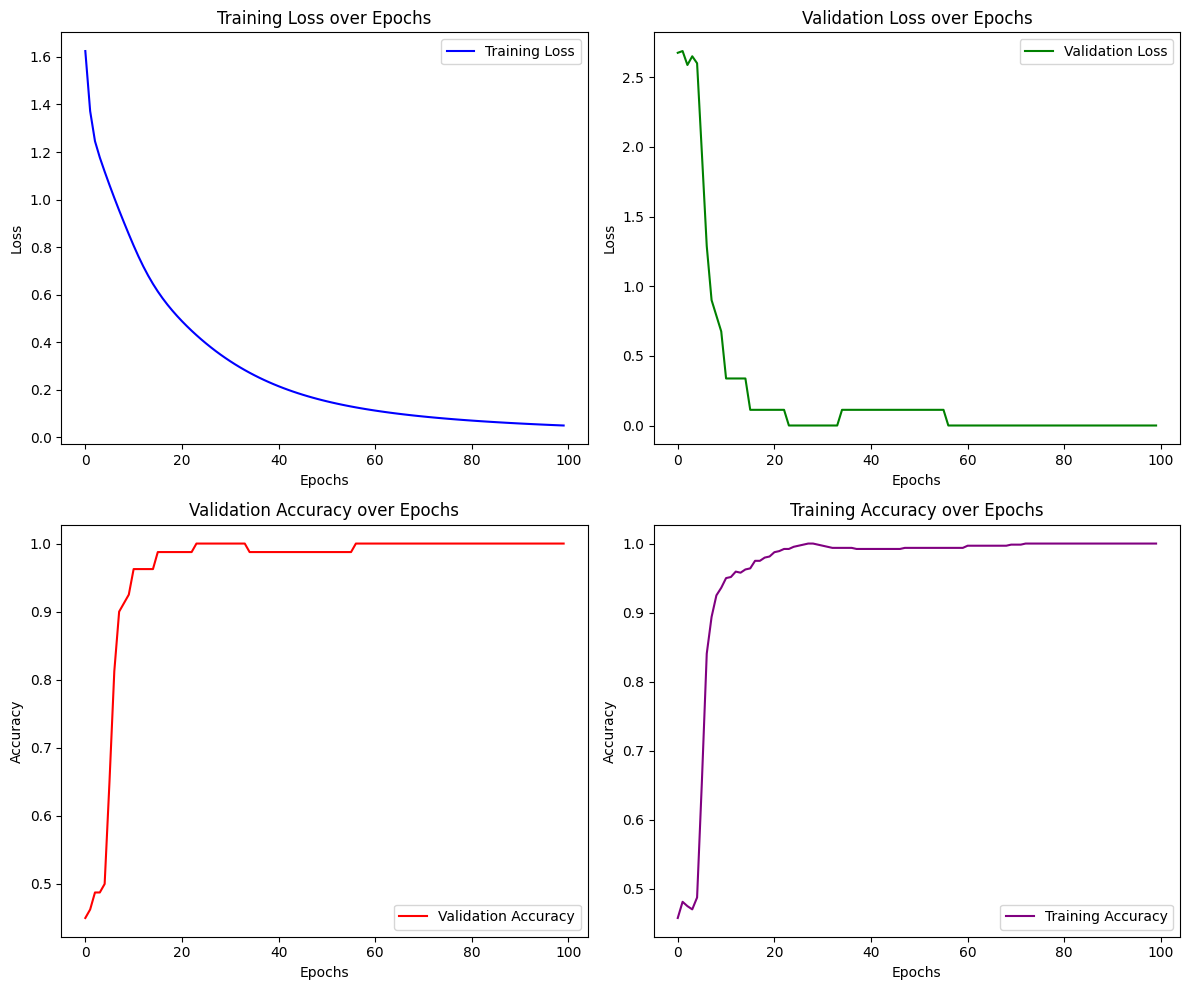

In [ ]:
# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
axs[0, 0].plot(train_loss, label='Training Loss', color='blue')
axs[0, 0].set_title('Training Loss over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot validation loss
axs[0, 1].plot(val_loss, label='Validation Loss', color='green')
axs[0, 1].set_title('Validation Loss over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot validation accuracy
axs[1, 0].plot(val_acc, label='Validation Accuracy', color='red')
axs[1, 0].set_title('Validation Accuracy over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plot training accuracy
axs[1, 1].plot(train_acc, label='Training Accuracy', color='purple')
axs[1, 1].set_title('Training Accuracy over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report for training data
train_report = classification_report(y_train, train_preds)
print("\nClassification Report for Training Data:")
print(train_report)



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00       157

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



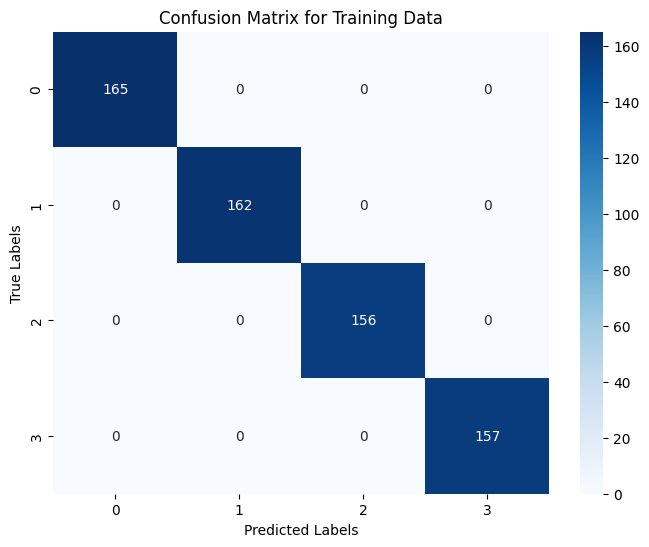

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for training data

train_cm = confusion_matrix(y_train, train_preds)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model1.classes_, yticklabels=mlp_model1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Data')
plt.show()



Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.99        38
           2       1.00      0.98      0.99        44
           3       1.00      1.00      1.00        43

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



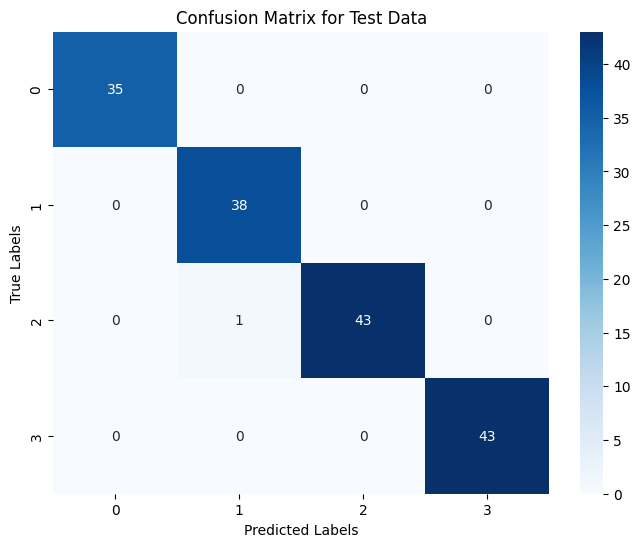

In [ ]:
# Classification report for test data
test_preds = mlp_model1.predict(x_test_scaled_imputed)
test_report = classification_report(y_test, test_preds)
print("\nClassification Report for Test Data:")
print(test_report)

# Confusion matrix for test data
test_cm = confusion_matrix(y_test, test_preds)

# Plotting the heatmap for test data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model1.classes_, yticklabels=mlp_model1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

##q2-3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


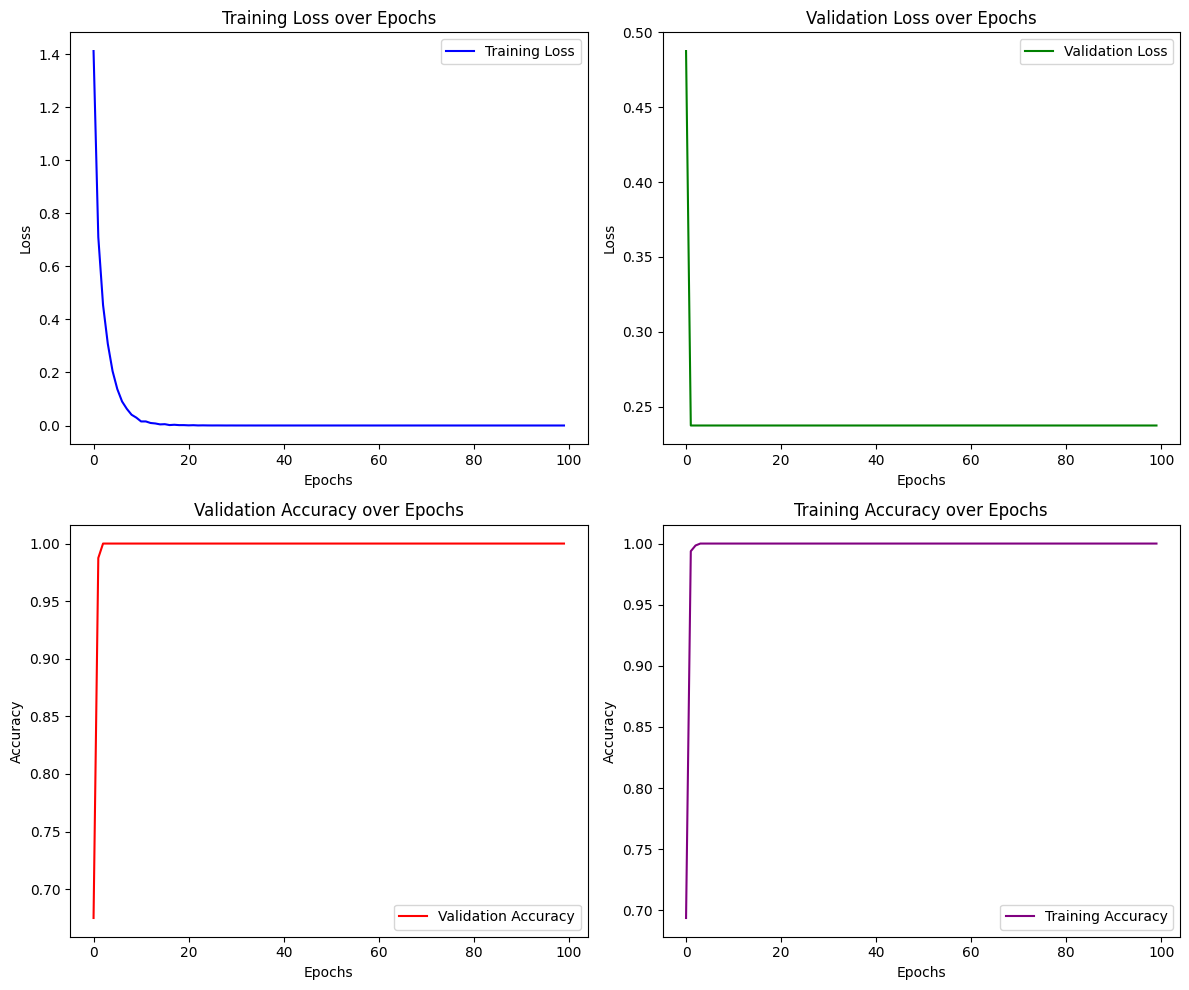


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00       157

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



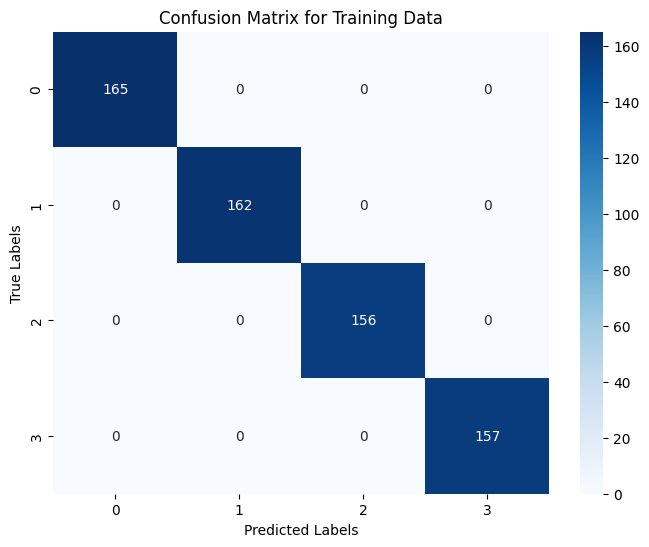


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



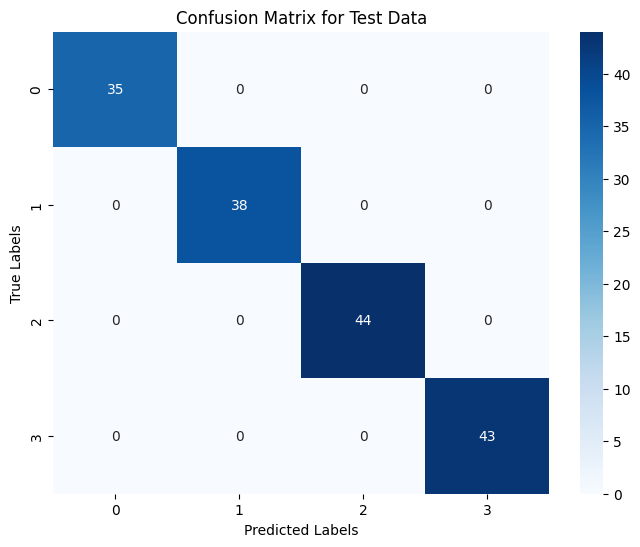

In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adding missing value to overcome the problem
imputer = SimpleImputer(strategy='mean')
x_train_scaled_imputed = imputer.fit_transform(x_train_scaled)
x_val_scaled_imputed = imputer.transform(x_val_scaled)
x_test_scaled_imputed = imputer.transform(x_test_scaled)

# Initializing MLPClassifier with specified parameters
mlp_model1 = MLPClassifier(hidden_layer_sizes=(20, 15), activation='tanh', solver='adam', learning_rate_init=0.01,
                           max_iter=1, warm_start=True, random_state=64, momentum=0.95)

# Initialize lists to store training loss, validation loss, validation accuracy, and training accuracy
train_loss = []
val_loss = []
val_acc = []
train_acc = []

# Train the model and collect metrics
for epoch in range(100):
    mlp_model1.fit(x_train_scaled_imputed, y_train)
    val_preds = mlp_model1.predict(x_val_scaled_imputed)
    train_preds = mlp_model1.predict(x_train_scaled_imputed)

    train_loss.append(mlp_model1.loss_)
    val_accuracy = accuracy_score(y_val, val_preds)

    # Hinge Loss for multi-class classification
    val_loss_epoch = np.mean(np.maximum(0, 1 - y_val * val_preds) ** 2)

    val_acc.append(val_accuracy)
    val_loss.append(val_loss_epoch)

    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, train_preds)
    train_acc.append(train_accuracy)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
axs[0, 0].plot(train_loss, label='Training Loss', color='blue')
axs[0, 0].set_title('Training Loss over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot validation loss
axs[0, 1].plot(val_loss, label='Validation Loss', color='green')
axs[0, 1].set_title('Validation Loss over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot validation accuracy
axs[1, 0].plot(val_acc, label='Validation Accuracy', color='red')
axs[1, 0].set_title('Validation Accuracy over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plot training accuracy
axs[1, 1].plot(train_acc, label='Training Accuracy', color='purple')
axs[1, 1].set_title('Training Accuracy over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Classification report for training data
train_report = classification_report(y_train, train_preds)
print("\nClassification Report for Training Data:")
print(train_report)

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, train_preds)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model1.classes_, yticklabels=mlp_model1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Data')
plt.show()

# Classification report for test data
test_preds = mlp_model1.predict(x_test_scaled_imputed)
test_report = classification_report(y_test, test_preds)
print("\nClassification Report for Test Data:")
print(test_report)

# Confusion matrix for test data
test_cm = confusion_matrix(y_test, test_preds)

# Plotting the heatmap for test data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model1.classes_, yticklabels=mlp_model1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()


In [ ]:
# Printing numerical results
print("Numerical Results:")
print(f"Training Loss: {train_loss[-1]}")
print(f"Validation Loss: {val_loss[-1]}")
print(f"Validation Accuracy: {val_acc[-1]}")
print(f"Training Accuracy: {train_acc[-1]}")

Numerical Results:
Training Loss: 0.00034032038343045597
Validation Loss: 0.2375
Validation Accuracy: 1.0
Training Accuracy: 1.0


## q2-4

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

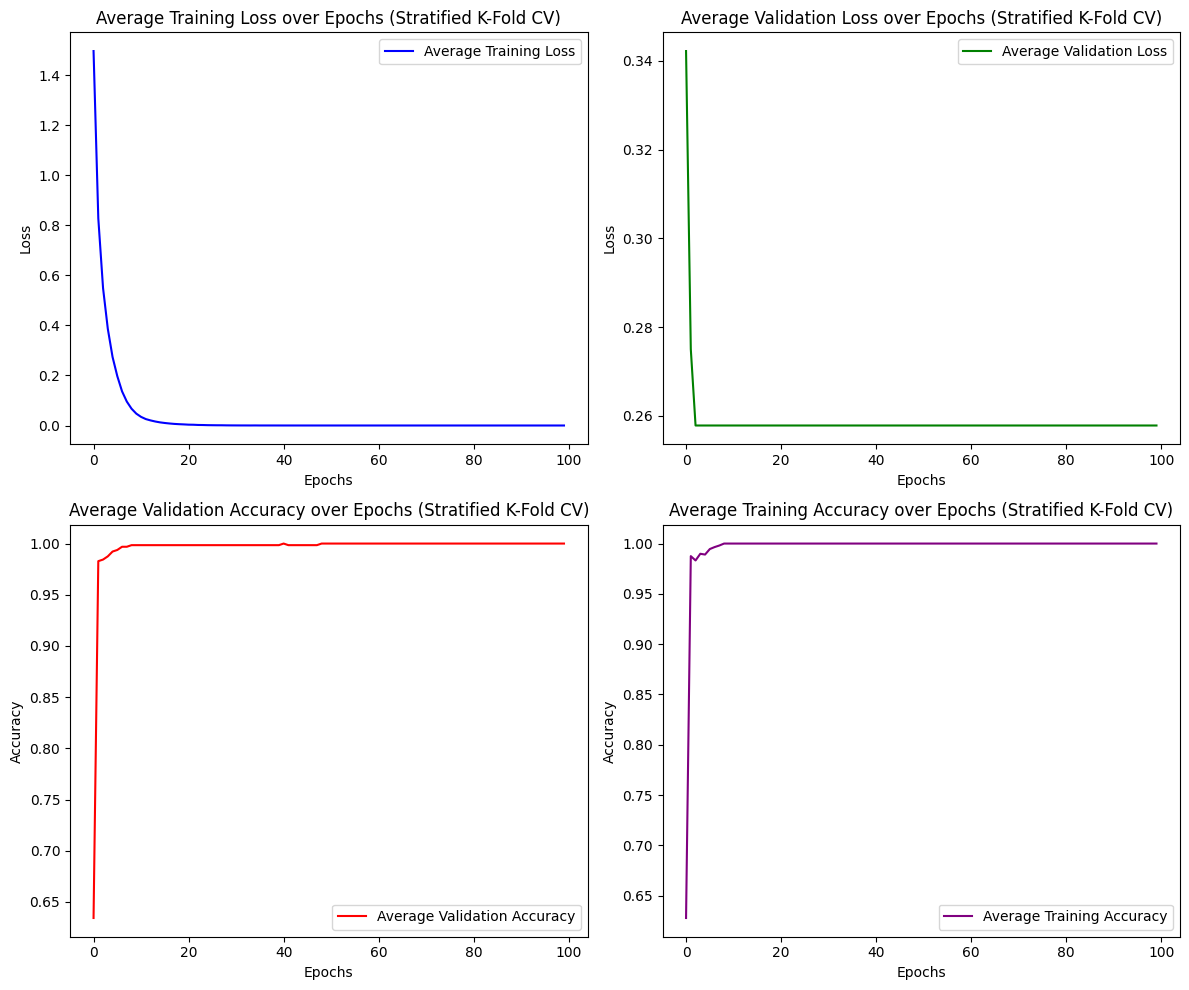

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define the number of splits for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
fold_train_loss = []
fold_val_loss = []
fold_val_acc = []
fold_train_acc = []

# Perform cross-validation
for train_index, val_index in skf.split(x_train_scaled_imputed, y_train):
    x_train_fold, x_val_fold = x_train_scaled_imputed[train_index], x_train_scaled_imputed[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Initialize MLPClassifier for each fold
    mlp_model_fold = MLPClassifier(hidden_layer_sizes=(20, 15), activation='tanh', solver='adam', learning_rate_init=0.01,
                                   max_iter=1, warm_start=True, random_state=64, momentum=0.95)

    # Train the model for each fold
    fold_train_loss_epoch = []
    fold_val_loss_epoch = []
    fold_val_acc_epoch = []
    fold_train_acc_epoch = []

    for epoch in range(100):
        mlp_model_fold.fit(x_train_fold, y_train_fold)
        val_preds_fold = mlp_model_fold.predict(x_val_fold)
        train_preds_fold = mlp_model_fold.predict(x_train_fold)

        # Calculate training and validation metrics for each epoch
        fold_train_loss_epoch.append(mlp_model_fold.loss_)
        fold_val_accuracy = accuracy_score(y_val_fold, val_preds_fold)
        fold_val_loss_epoch.append(np.mean(np.maximum(0, 1 - y_val_fold * val_preds_fold) ** 2))
        fold_train_acc_epoch.append(accuracy_score(y_train_fold, train_preds_fold))
        fold_val_acc_epoch.append(fold_val_accuracy)

    # Store the metrics for each fold
    fold_train_loss.append(fold_train_loss_epoch)
    fold_val_loss.append(fold_val_loss_epoch)
    fold_train_acc.append(fold_train_acc_epoch)
    fold_val_acc.append(fold_val_acc_epoch)

# Calculate average metrics across folds
avg_train_loss = np.mean(fold_train_loss, axis=0)
avg_val_loss = np.mean(fold_val_loss, axis=0)
avg_train_acc = np.mean(fold_train_acc, axis=0)
avg_val_acc = np.mean(fold_val_acc, axis=0)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot average training loss across folds
axs[0, 0].plot(avg_train_loss, label='Average Training Loss', color='blue')
axs[0, 0].set_title('Average Training Loss over Epochs (Stratified K-Fold CV)')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plot average validation loss across folds
axs[0, 1].plot(avg_val_loss, label='Average Validation Loss', color='green')
axs[0, 1].set_title('Average Validation Loss over Epochs (Stratified K-Fold CV)')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plot average validation accuracy across folds
axs[1, 0].plot(avg_val_acc, label='Average Validation Accuracy', color='red')
axs[1, 0].set_title('Average Validation Accuracy over Epochs (Stratified K-Fold CV)')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plot average training accuracy across folds
axs[1, 1].plot(avg_train_acc, label='Average Training Accuracy', color='purple')
axs[1, 1].set_title('Average Training Accuracy over Epochs (Stratified K-Fold CV)')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


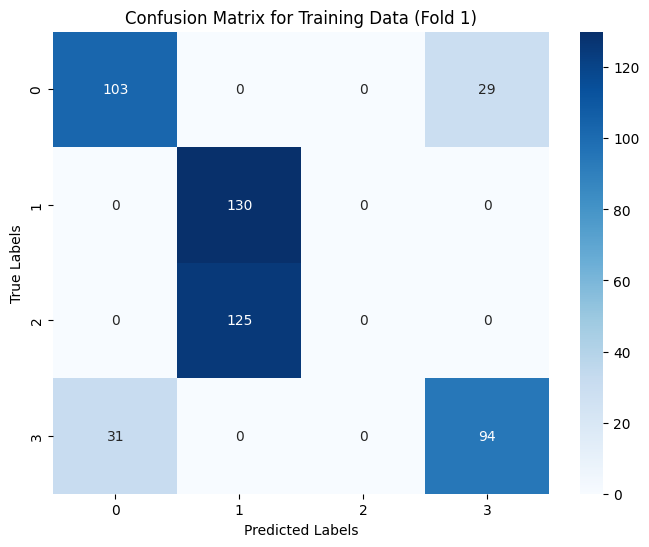

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


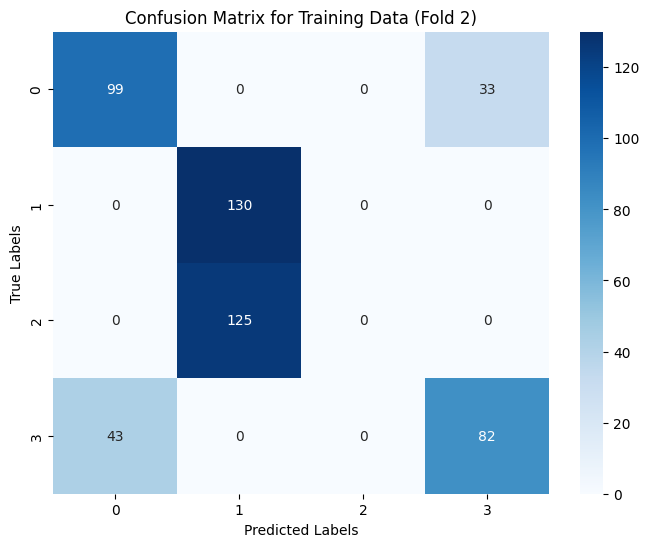

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


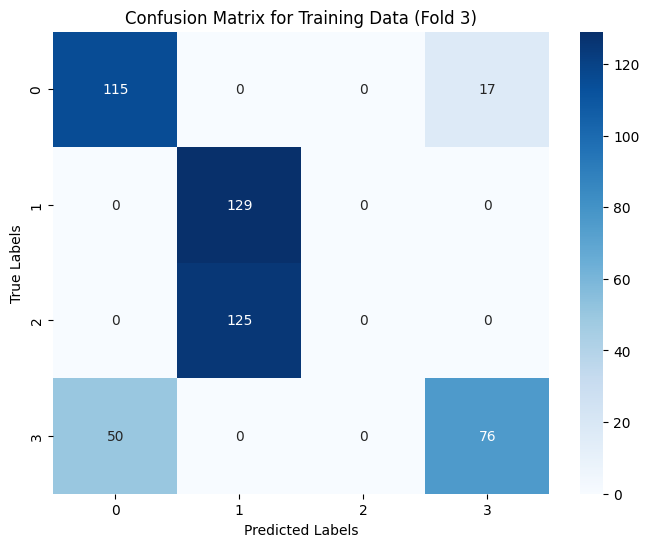

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


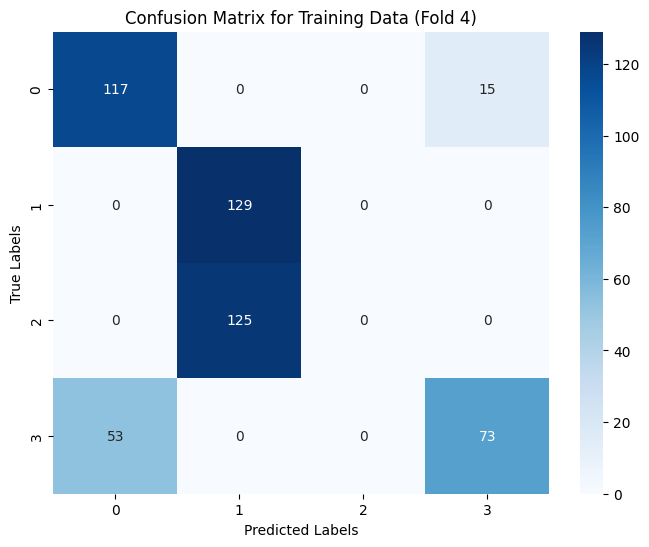

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


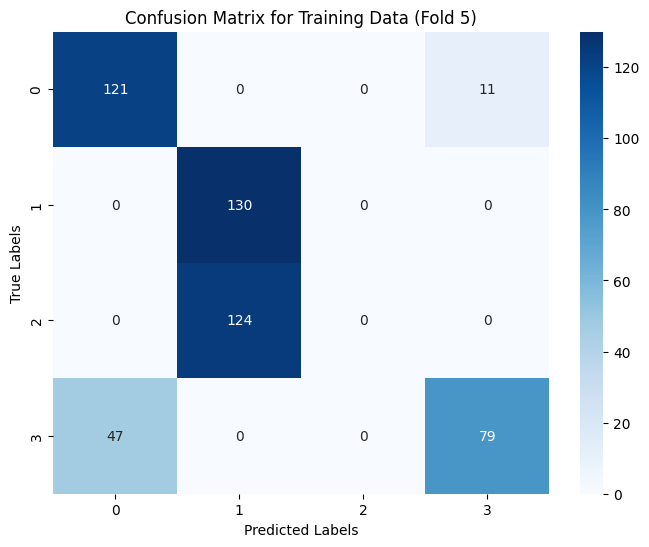

In [ ]:
# Confusion matrix for each fold's training data
for i, (train_index, val_index) in enumerate(skf.split(x_train_scaled_imputed, y_train)):
    x_train_fold, x_val_fold = x_train_scaled_imputed[train_index], x_train_scaled_imputed[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    mlp_model_fold = MLPClassifier(hidden_layer_sizes=(20, 15), activation='tanh', solver='adam', learning_rate_init=0.01,
                                   max_iter=1, warm_start=True, random_state=64, momentum=0.95)

    mlp_model_fold.fit(x_train_fold, y_train_fold)
    train_preds_fold = mlp_model_fold.predict(x_train_fold)

    train_cm_fold = confusion_matrix(y_train_fold, train_preds_fold)

    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_fold, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model_fold.classes_, yticklabels=mlp_model_fold.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for Training Data (Fold {i+1})')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

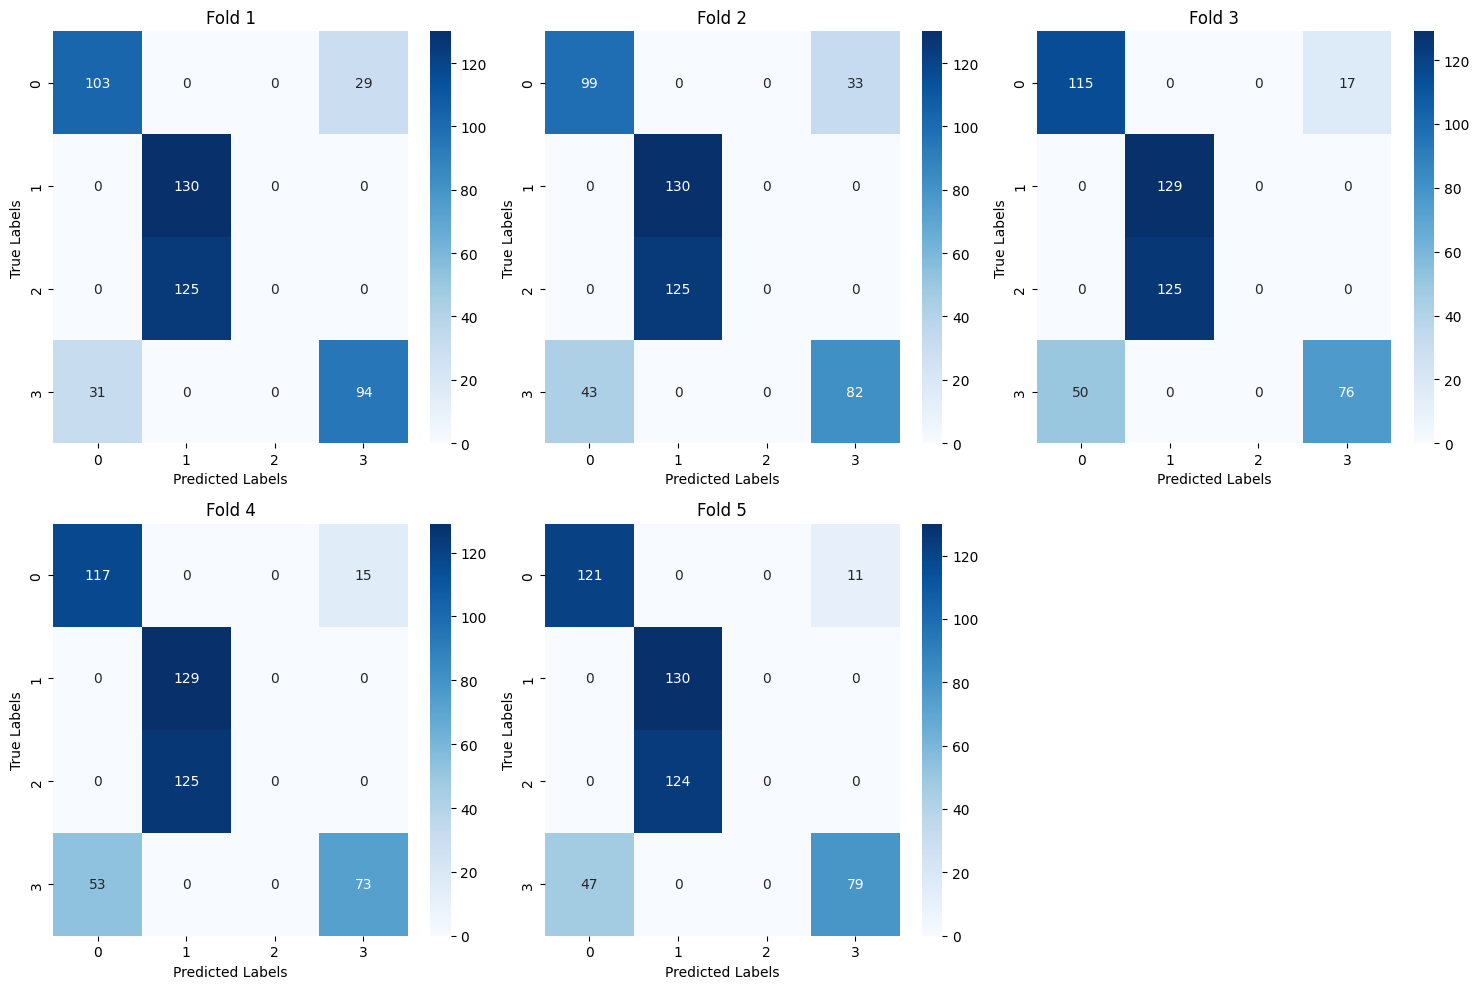

In [ ]:
plt.figure(figsize=(15, 10))

for i, (train_index, val_index) in enumerate(skf.split(x_train_scaled_imputed, y_train)):
    x_train_fold, x_val_fold = x_train_scaled_imputed[train_index], x_train_scaled_imputed[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    mlp_model_fold = MLPClassifier(hidden_layer_sizes=(20, 15), activation='tanh', solver='adam', learning_rate_init=0.01,
                                   max_iter=1, warm_start=True, random_state=64, momentum=0.95)

    mlp_model_fold.fit(x_train_fold, y_train_fold)
    train_preds_fold = mlp_model_fold.predict(x_train_fold)

    train_cm_fold = confusion_matrix(y_train_fold, train_preds_fold)

    ax = plt.subplot(2, 3, i+1)
    sns.heatmap(train_cm_fold, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model_fold.classes_, yticklabels=mlp_model_fold.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Fold {i+1}')
    plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

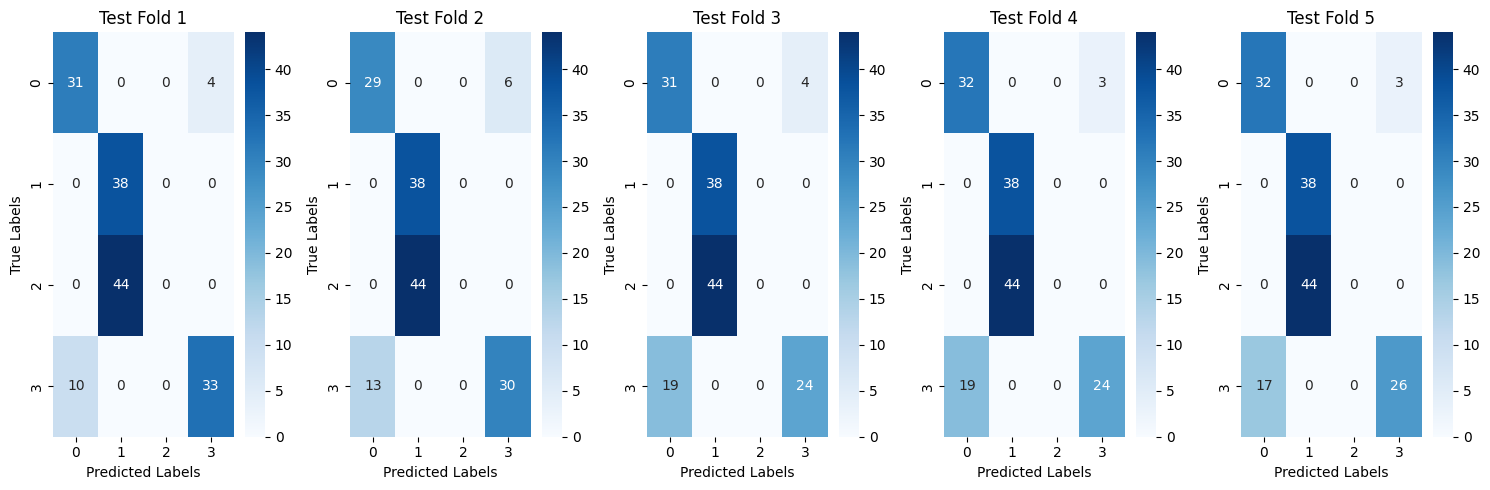

In [ ]:
# Initialize lists to store confusion matrices for test data
test_cms = []

# Confusion matrix for each fold's test data
for i, (train_index, test_index) in enumerate(skf.split(x_train_scaled_imputed, y_train)):
    x_train_fold, x_test_fold = x_train_scaled_imputed[train_index], x_train_scaled_imputed[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    mlp_model_fold = MLPClassifier(hidden_layer_sizes=(20, 15), activation='tanh', solver='adam', learning_rate_init=0.01,
                                   max_iter=1, warm_start=True, random_state=64, momentum=0.95)

    mlp_model_fold.fit(x_train_fold, y_train_fold)
    test_preds_fold = mlp_model_fold.predict(x_test_scaled_imputed)

    test_cm_fold = confusion_matrix(y_test, test_preds_fold)
    test_cms.append(test_cm_fold)

# Plotting confusion matrices for test data
plt.figure(figsize=(15, 5))

for i, test_cm_fold in enumerate(test_cms):
    ax = plt.subplot(1, 5, i+1)
    sns.heatmap(test_cm_fold, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model_fold.classes_, yticklabels=mlp_model_fold.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Test Fold {i+1}')
    plt.tight_layout()

plt.show()


In [ ]:
# Confusion matrix for each fold's test data
for i, (train_index, test_index) in enumerate(skf.split(x_train_scaled_imputed, y_train)):
    x_train_fold, x_test_fold = x_train_scaled_imputed[train_index], x_train_scaled_imputed[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    mlp_model_fold = MLPClassifier(hidden_layer_sizes=(20, 15), activation='tanh', solver='adam', learning_rate_init=0.01,
                                   max_iter=1, warm_start=True, random_state=64, momentum=0.95)

    mlp_model_fold.fit(x_train_fold, y_train_fold)
    test_preds_fold = mlp_model_fold.predict(x_test_scaled_imputed)

    test_cm_fold = confusion_matrix(y_test, test_preds_fold)

    print(f'Confusion Matrix for Test Data (Fold {i+1}):')
    print(test_cm_fold)


Confusion Matrix for Test Data (Fold 1):
[[31  0  0  4]
 [ 0 38  0  0]
 [ 0 44  0  0]
 [10  0  0 33]]
Confusion Matrix for Test Data (Fold 2):
[[29  0  0  6]
 [ 0 38  0  0]
 [ 0 44  0  0]
 [13  0  0 30]]
Confusion Matrix for Test Data (Fold 3):
[[31  0  0  4]
 [ 0 38  0  0]
 [ 0 44  0  0]
 [19  0  0 24]]
Confusion Matrix for Test Data (Fold 4):
[[32  0  0  3]
 [ 0 38  0  0]
 [ 0 44  0  0]
 [19  0  0 24]]
Confusion Matrix for Test Data (Fold 5):
[[32  0  0  3]
 [ 0 38  0  0]
 [ 0 44  0  0]
 [17  0  0 26]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686

#q3

##import datasets for q3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')



In [ ]:
https://drive.google.com/file/d/1HNyH6Sbe0yQkz-xCQBYi--VahNr1hYPd/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1HNyH6Sbe0yQkz-xCQBYi--VahNr1hYPd

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1HNyH6Sbe0yQkz-xCQBYi--VahNr1hYPd
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 14.5MB/s]


In [ ]:
data= pd.read_csv('/content/drug200.csv')

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
label = data['Drug']
X= len(label)
Y=label.unique()
label.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

Text(0.5, 0, 'Classes')

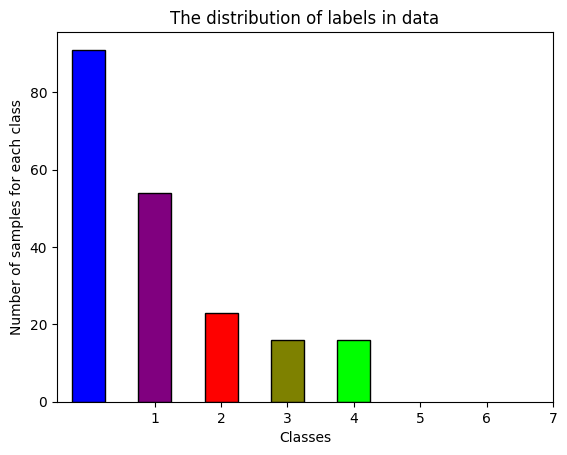

In [ ]:
hist = label.value_counts()
y = np.unique(label)
cmap = cm.get_cmap('brg')
plt.bar(y, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(1,8), range(1,8));
plt.title('The distribution of labels in data')
plt.ylabel('Number of samples for each class')
plt.xlabel('Classes')

In [ ]:
x=np.array(data.loc[:,data.columns!='Drug'])
y=np.array(data.loc[:,data.columns=='Drug'])

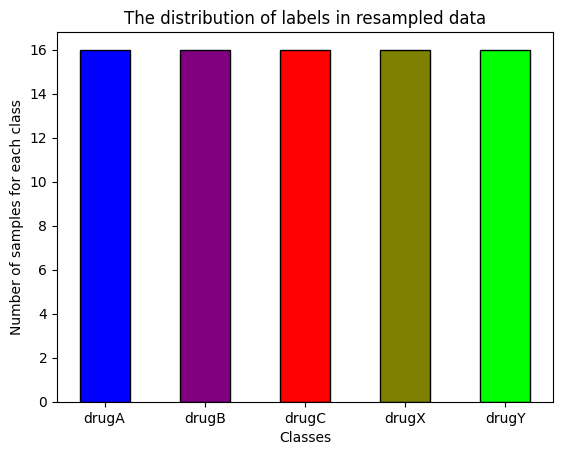

In [ ]:

# Initialize the RandomUnderSampler
sampler = RandomUnderSampler(random_state=64)

# Fit the sampler to the data and perform undersampling
x_resampled, y_resampled = sampler.fit_resample(x, y)

# Calculate value counts for the resampled labels
label_counts_resampled = pd.Series(y_resampled).value_counts()

# Get unique labels and their counts
y_unique_resampled = label_counts_resampled.index
hist_resampled = label_counts_resampled.values

# Create a colormap
cmap = cm.get_cmap('brg')

# Plot the histogram for the resampled data
plt.bar(y_unique_resampled, hist_resampled, width=0.5, edgecolor='black', color=cmap(np.linspace(0, 1, len(hist_resampled))))
plt.xticks(y_unique_resampled)
plt.title('The distribution of labels in resampled data')
plt.ylabel('Number of samples for each class')
plt.xlabel('Classes')
plt.show()


##q3-1

In [ ]:
# Split resampled data into training and testing sets
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(
    x_resampled,
    y_resampled,
    random_state=64,
    test_size=0.15,
    shuffle=True
)


In [ ]:

# Split original data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=64,
    test_size=0.15,
    shuffle=True
)

Training set accuracy: 1.0000
Testing set accuracy: 1.0000


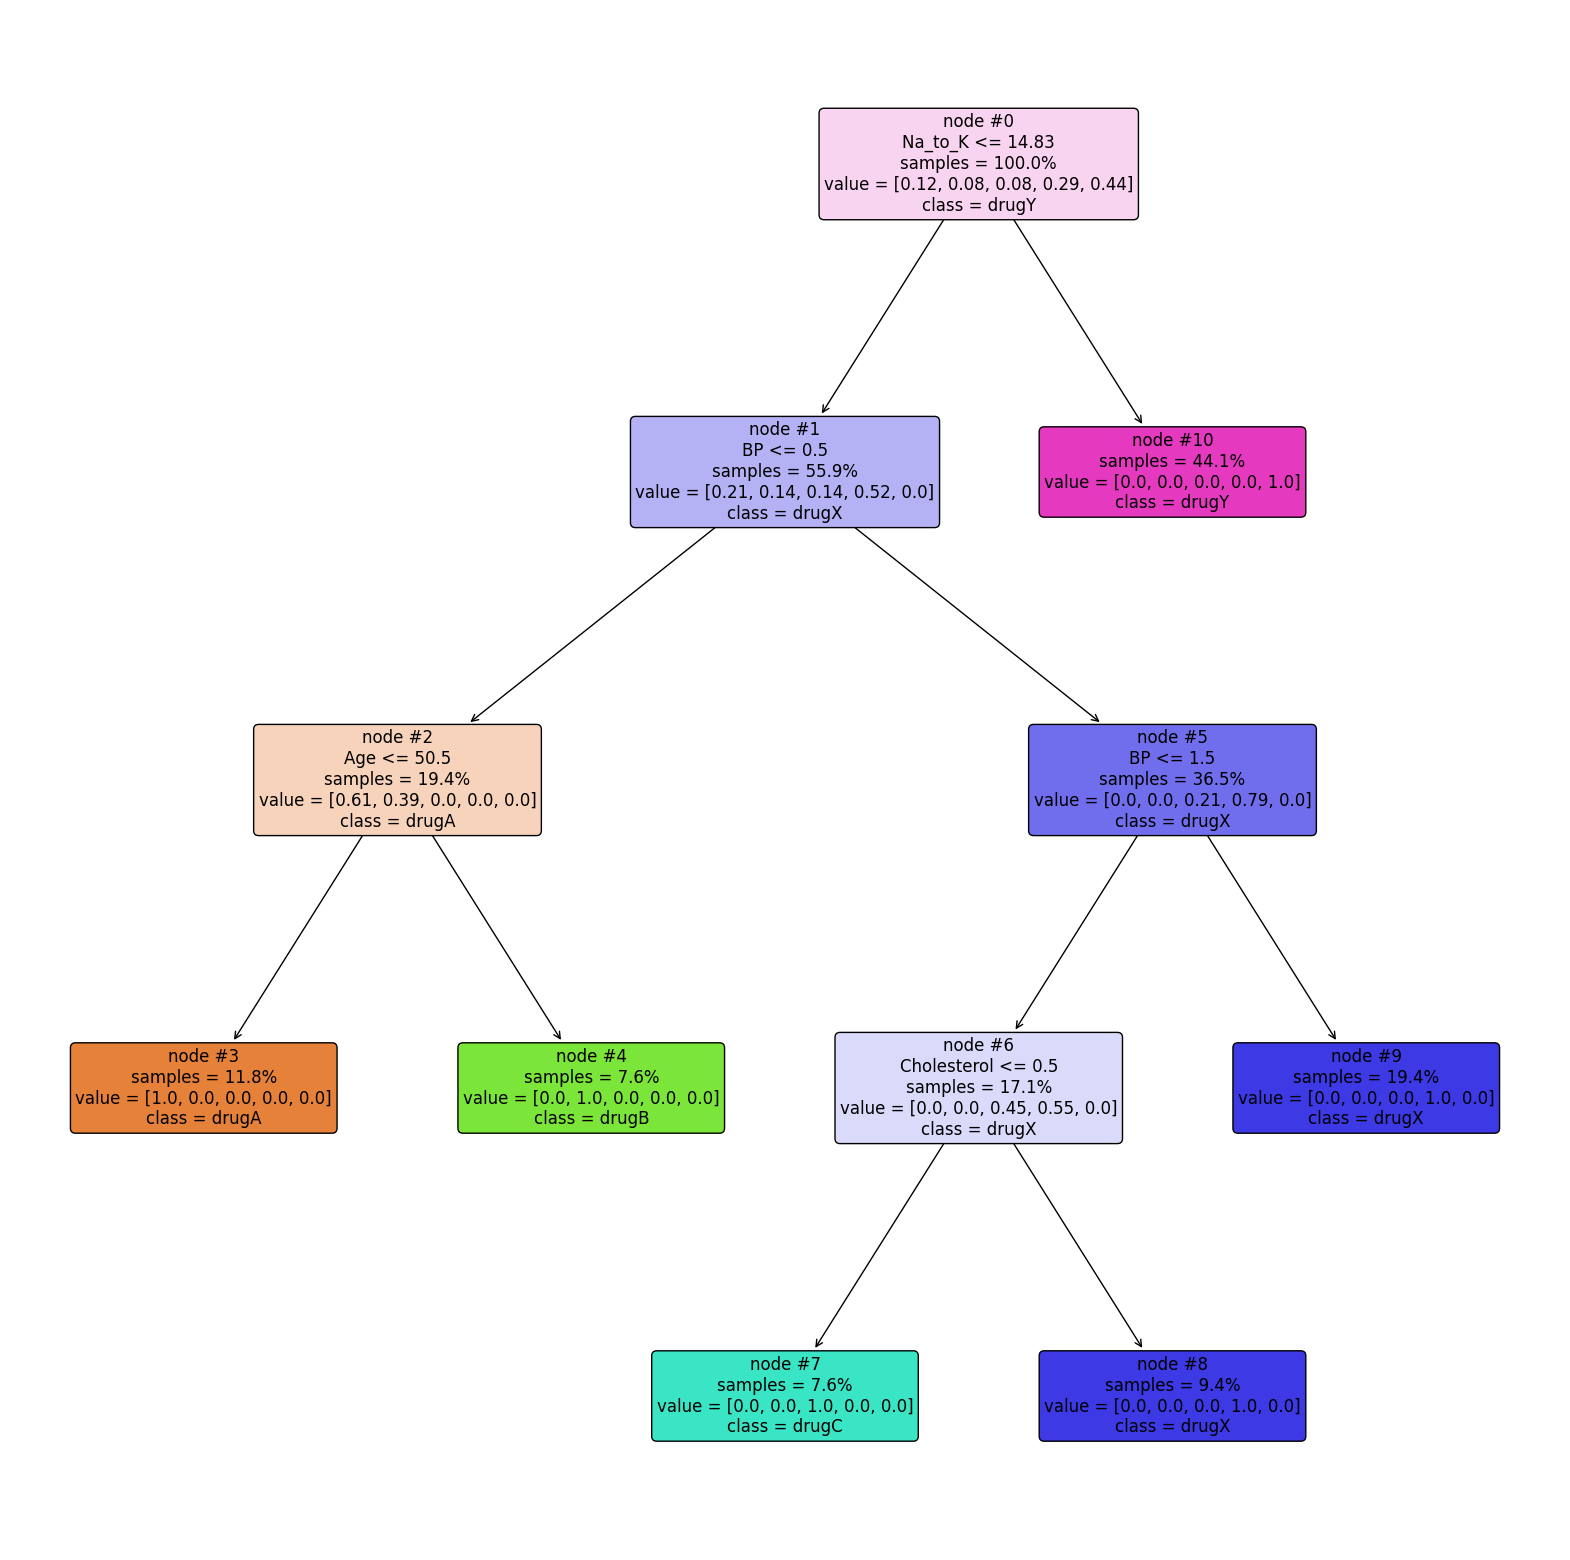

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Encode categorical variables
label_encoders = {}
data_encoded = data.copy()  # Make a copy of the original data
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data_encoded[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop(columns=['Drug'])
y = data_encoded['Drug']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=64)

# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=64)
dt.fit(X_train, y_train)

# Evaluate the model
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"Training set accuracy: {train_score:.4f}")
print(f"Testing set accuracy: {test_score:.4f}")

plt.figure(figsize=(20, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=label_encoders['Drug'].classes_, fontsize=12, rounded=True, impurity=False, node_ids=True, proportion=True, precision=2)
plt.show()

Training set accuracy: 1.0000
Testing set accuracy: 1.0000


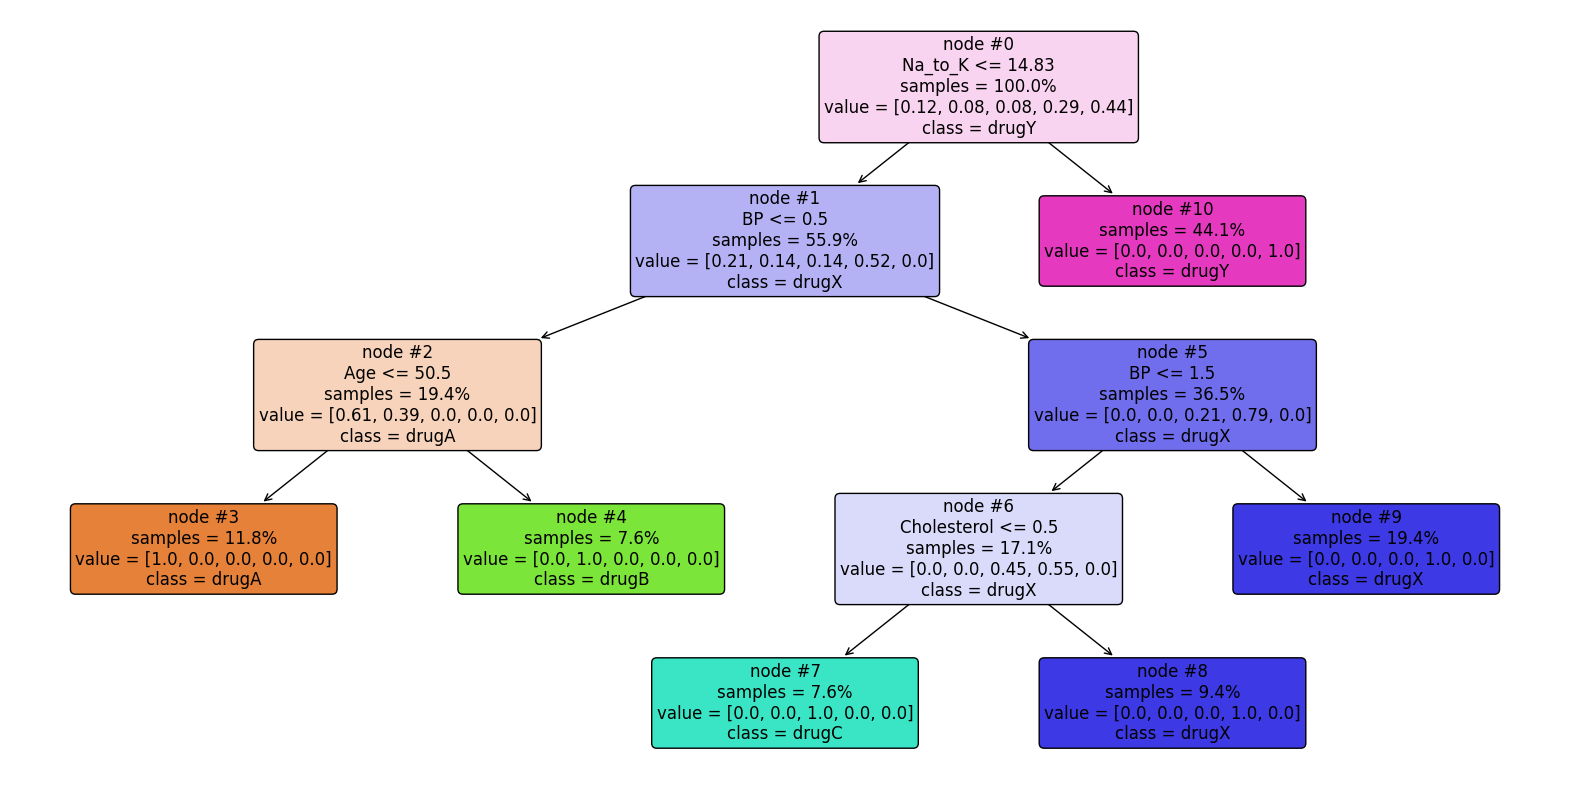

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt


# Encode categorical variables
label_encoders = {}
data_encoded = data.copy()  # Make a copy of the original data
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data_encoded[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop(columns=['Drug'])
y = data_encoded['Drug']

# Downsample the majority class
X_resampled, y_resampled = resample(X[y == 'majority_class'], y[y == 'majority_class'], random_state=64, replace=False)

# Combine the downsampled majority class with the minority class
X_resampled = pd.concat([X_resampled, X[y != 'majority_class']])
y_resampled = pd.concat([y_resampled, y[y != 'majority_class']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=24)

# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train, y_train)

# Evaluate the model
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)
print(f"Training set accuracy: {train_score:.4f}")
print(f"Testing set accuracy: {test_score:.4f}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=label_encoders['Drug'].classes_, fontsize=12, rounded=True, impurity=False, node_ids=True, proportion=True, precision=2)
plt.show()


# q4

## import and upload dataset for q4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
https://drive.google.com/file/d/1EjdePF1lkEA16JxT0PnCZBVyzNaribtA/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown

ERROR: Operation cancelled by user


In [ ]:
!gdown 1EjdePF1lkEA16JxT0PnCZBVyzNaribtA

Downloading...
From: https://drive.google.com/uc?id=1EjdePF1lkEA16JxT0PnCZBVyzNaribtA
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 58.5MB/s]


In [ ]:
data = pd.read_csv ('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


target
0    499
1    526
dtype: int64


<Axes: xlabel='target', ylabel='count'>

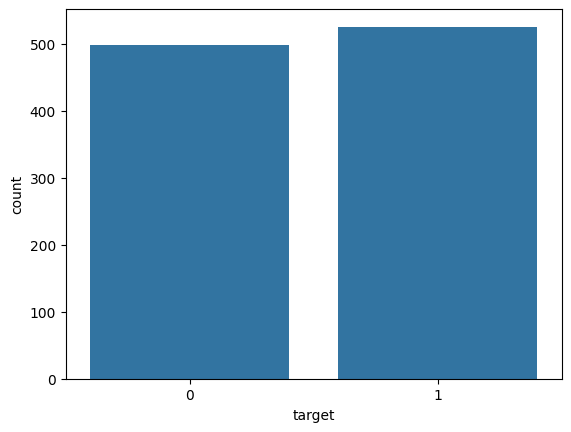

In [ ]:
a=data.groupby('target').size()
print (a)
sns.countplot(x='target', data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

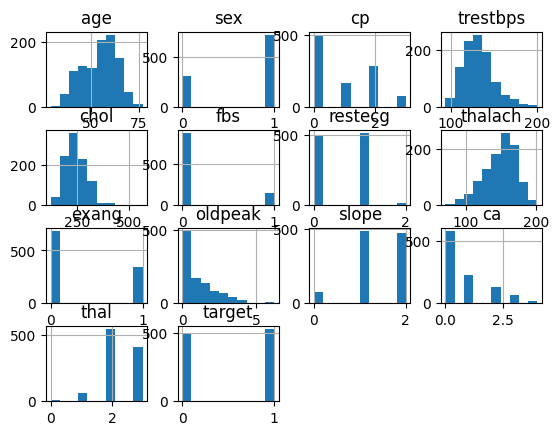

In [ ]:
data.hist()


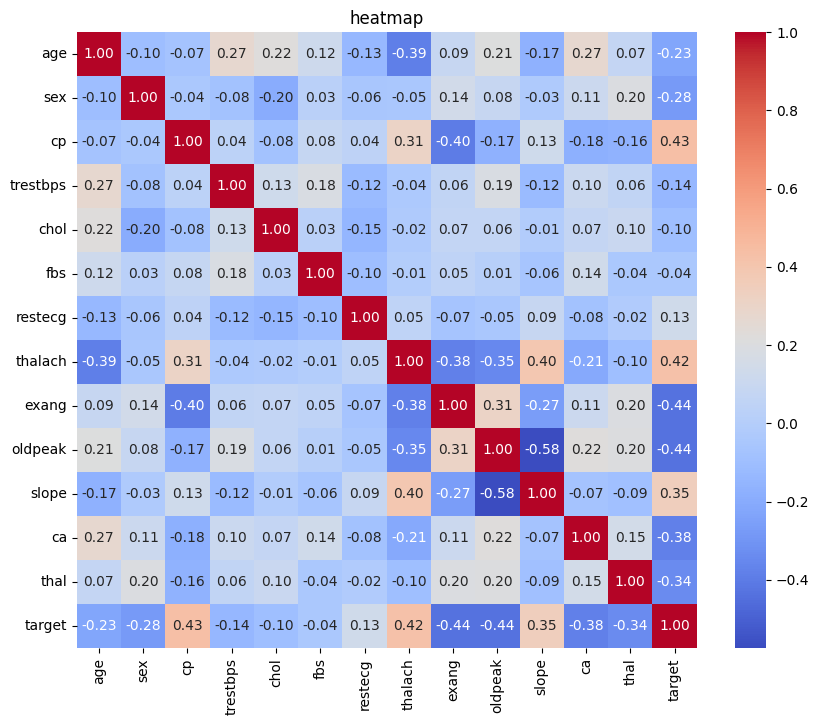

In [ ]:
import seaborn as sns

# محاسبه ماتریس همبستگی
correlation_matrix = data.corr()

# ایجاد شکل و نمودار حرارتی
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('heatmap')
plt.show()

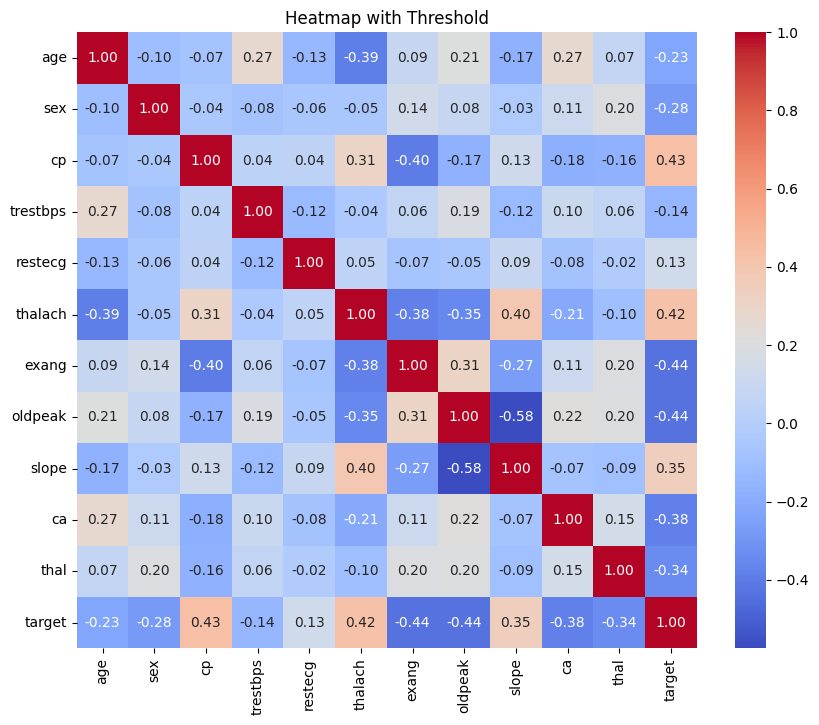

Remaining Relevant Features:
Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:

# Filter correlation matrix to include only features with correlation above 0.35 with 'target'
threshold = 0.13
relevant_features = correlation_matrix[abs(correlation_matrix['target']) > threshold]['target'].index

# Subset the correlation matrix based on relevant features
relevant_corr_matrix = correlation_matrix.loc[relevant_features, relevant_features]

# Create the heatmap with the filtered correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(relevant_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap with Threshold')
plt.show()
# Print the features that remain after filtering
print("Remaining Relevant Features:")
print(relevant_features)


## q4

Spliting Data

In [ ]:
X=np.array(data.loc[:,data.columns!='target'])
y=np.array(data.loc[:,data.columns=='target'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  =   train_test_split(X,y,test_size=0.2,random_state=64)
print('train:',X_train.shape, y_train.shape,'\ntest: ', X_test.shape, y_test.shape)

train: (820, 13) (820, 1) 
test:  (205, 13) (205, 1)


scaler:



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
print('befor sc:',X_train[:1])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('after sc:',X_train[:1])

befor sc: [[ 39.    1.    0.  118.  219.    0.    1.  140.    0.    1.2   1.    0.
    3. ]]
after sc: [[-1.65537213  0.67180908 -0.92968874 -0.78924414 -0.50477689 -0.42809016
   0.87469072 -0.41678349 -0.6948532   0.13394758 -0.62601821 -0.70305671
   1.10610207]]


to use naive_bayes I import GaussianNB from sklearn because its easier and gives same result

In [ ]:
from sklearn.naive_bayes import GaussianNB
SK_NB=GaussianNB()
SK_NB.fit(X_train,y_train.ravel())
pred = SK_NB.predict(X_test)
print(pred)

[0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0]


eva

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       113
           1       0.77      0.86      0.81        92

    accuracy                           0.82       205
   macro avg       0.82      0.83      0.82       205
weighted avg       0.83      0.82      0.82       205



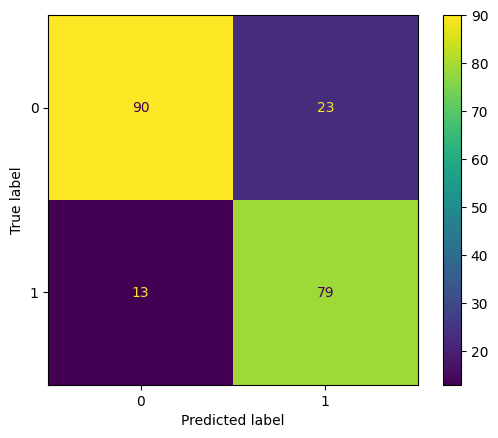

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)
names = list(data.groupby('target').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot()
plt.show()

10 random data to Compare actual vs predicted outputs for each random data point

In [ ]:
print('true label:',y_test.ravel()[85:90])
print('pred label:',pred[85:90])


true label: [1 1 1 1 1]
pred label: [0 1 1 0 1]


In [ ]:
#chose 10 random data
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)

# Extract the random test data and actual outputs
random_test_data = X_test[random_indices]
actual_outputs = y_test[random_indices]

# Compare actual vs predicted outputs for each random data point
for idx, (actual, predicted) in enumerate(zip(actual_outputs, pred[random_indices])):
    print(f"Random Data Point {idx+1}: Actual={actual}, Predicted={predicted}")


Random Data Point 1: Actual=[0], Predicted=0
Random Data Point 2: Actual=[0], Predicted=0
Random Data Point 3: Actual=[0], Predicted=1
Random Data Point 4: Actual=[0], Predicted=0
Random Data Point 5: Actual=[0], Predicted=0
Random Data Point 6: Actual=[0], Predicted=0
Random Data Point 7: Actual=[0], Predicted=1
Random Data Point 8: Actual=[0], Predicted=0
Random Data Point 9: Actual=[0], Predicted=0
Random Data Point 10: Actual=[1], Predicted=1


In [ ]:
from tabulate import tabulate
#  data1
data1 = {
    'Data Point': [f"Random Data Point {idx+1}" for idx in range(10)],
    'Actual': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    'Predicted': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
}

# Create DataFrame
df = pd.DataFrame(data1)

# Format DataFrame as a table using tabulate
table_str = tabulate(df, headers='keys', tablefmt='pipe', showindex=False)

# Print the formatted table (you can also save it to a file)
print(table_str)

| Data Point           |   Actual |   Predicted |
|:---------------------|---------:|------------:|
| Random Data Point 1  |        0 |           0 |
| Random Data Point 2  |        0 |           0 |
| Random Data Point 3  |        0 |           1 |
| Random Data Point 4  |        0 |           0 |
| Random Data Point 5  |        0 |           0 |
| Random Data Point 6  |        0 |           0 |
| Random Data Point 7  |        0 |           1 |
| Random Data Point 8  |        0 |           0 |
| Random Data Point 9  |        0 |           0 |
| Random Data Point 10 |        1 |           1 |


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming 'data' is your pandas DataFrame containing the data
# Extract relevant features and target variable
relevant_features = ['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target']
X = data[relevant_features].values  # Features
y = data['target'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Gaussian Naive Bayes classifier
SK_NB = GaussianNB()
SK_NB.fit(X_train_scaled, y_train)

# Make predictions on the test set
pred = SK_NB.predict(X_test_scaled)

# Print predictions
print(pred)


[0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1]


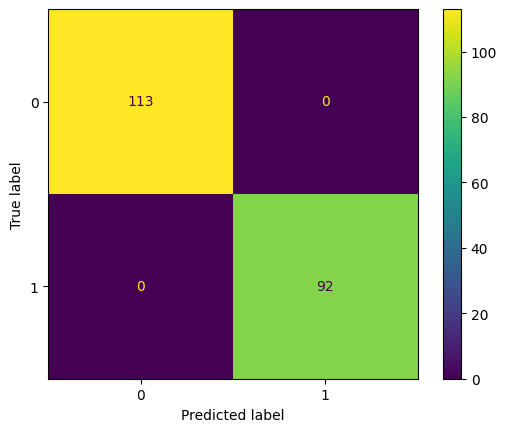

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)
names = list(data.groupby('target').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        92

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

